In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (24, 8)
np.random.seed(42)

### Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)

- BALANCE : Balance amount left in their account to make purchases 

- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 not frequently updated)         

- PURCHASES : Amount of purchases made from account

- ONEOFFPURCHASES : Maximum purchase amount done in one-go

- INSTALLMENTSPURCHASES : Amount of purchase done in installment

- CASHADVANCE : Cash in advance given by the user

- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

- PURCHASESTRX : Numbe of purchase transactions made

- CREDITLIMIT : Limit of Credit Card for user

- PAYMENTS : Amount of Payment done by user

- MINIMUM_PAYMENTS : Minimum amount of payments made by user

- PRCFULLPAYMENT : Percent of full payment paid by user

- TENURE : Tenure of credit card service for user

## Load Data:

In [2]:
df = pd.read_csv('CC GENERAL.csv', index_col=0)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [4]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Data validation:
- Handling missing values.
- Validating the semantic meaning among data columns.

In [5]:
# Check null values count.
cols_with_nulls = df.isnull().sum()
cols_with_nulls[cols_with_nulls > 0].sort_values(ascending=False)

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
dtype: int64

In [6]:
# Drop the single sull sample in "CREDIT_LIMIT"
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [7]:
df[df['MINIMUM_PAYMENTS'].isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10004   1666.670542           0.636364    1499.00           1499.00   
C10047   2242.311686           1.000000     437.00             97.00   
C10049   3910.111237           1.000000       0.00              0.00   
C10056      6.660517           0.636364     310.00              0.00   
C10057   1311.995984           1.000000    1283.90           1283.90   
...              ...                ...        ...               ...   
C19160     14.524779           0.333333     152.00            152.00   
C19170    371.527312           0.333333       0.00              0.00   
C19176    183.817004           1.000000     465.90              0.00   
C19185    193.571722           0.833333    1012.73           1012.73   
C19187     19.183215           1.000000     300.00              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10004                      0.0    205.788017             0.083333   
C10047                    340.0    184.648692             0.333333   
C10049                      0.0   1980.873201             0.000000   
C10056                    310.0      0.000000             0.666667   
C10057                      0.0      0.000000             0.250000   
...                         ...           ...                  ...   
C19160                      0.0      0.000000             0.333333   
C19170                      0.0   1465.407927             0.000000   
C19176                    465.9      0.000000             1.000000   
C19185                      0.0      0.000000             0.333333   
C19187                    300.0      0.000000             1.000000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10004                     0.083333                          0.000000   
C10047                     0.083333                          0.333333   
C10049                     0.000000                          0.000000   
C10056                     0.000000                          0.666667   
C10057                     0.250000                          0.000000   
...                             ...                               ...   
C19160                     0.333333                          0.000000   
C19170                     0.000000                          0.000000   
C19176                     0.000000                          0.833333   
C19185                     0.333333                          0.000000   
C19187                     0.000000                          0.833333   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10004                 0.083333                 1              1   
C10047                 0.166667                 2              5   
C10049                 0.500000                 7              0   
C10056                 0.000000                 0              8   
C10057                 0.000000                 0              6   
...                         ...               ...            ...   
C19160                 0.000000                 0              2   
C19170                 0.166667                 5              0   
C19176                 0.000000                 0              6   
C19185                 0.000000                 0              2   
C19187                 0.000000                 0              6   

         CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                        
C10004         7500.0    0.000000               NaN               0.0      12  
C10047         2400.0    0.000000               NaN               0.0      12  
C10049    

In [8]:
# For the 313 nulls in "MINIMUM_PAYMENTS"
# we will try two approaches:
# first is the no-guessing approach where all the 313 null samples will be dropped. 
df_no_guessing = df.dropna(subset=['MINIMUM_PAYMENTS'])
df_no_guessing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CRED

In [9]:
# Second approach: Try to use the semantic relationships among columns to fill the missing values
# For example: "MINIMUM_PAYMENTS" values can not exceed its coressponding values 
# in "PAYMENTS" or "CREDIT_LIMIT" 
df.describe()[['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]

CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS
count   8949.000000   8949.000000       8636.000000
mean    4494.449450   1733.336511        864.304943
std     3638.815725   2895.168146       2372.566350
min       50.000000      0.000000          0.019163
25%     1600.000000    383.282850        169.163545
50%     3000.000000    857.062706        312.452292
75%     6500.000000   1901.279320        825.496463
max    30000.000000  50721.483360      76406.207520

In [10]:
# show rows where 'MINIMUM_PAYMENTS' exceeds 'PAYMENTS' or 'CREDIT_LIMIT'
df[(df['MINIMUM_PAYMENTS'] > df['PAYMENTS']) | (df['MINIMUM_PAYMENTS'] > df['CREDIT_LIMIT'])] # 2409 rows

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10003   2495.148862           1.000000     773.17            773.17   
C10006   1809.828751           1.000000    1333.28              0.00   
C10011   1293.124939           1.000000     920.12              0.00   
C10015   2772.772734           1.000000       0.00              0.00   
C10016   6886.213231           1.000000    1611.70              0.00   
...              ...                ...        ...               ...   
C19174    735.652303           1.000000     619.60            255.62   
C19180    728.352548           1.000000     734.40            734.40   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10003                     0.00      0.000000             1.000000   
C10006                  1333.28      0.000000             0.666667   
C10011                   920.12      0.000000             1.000000   
C10015                     0.00    346.811390             0.000000   
C10016                  1611.70   2301.491267             0.500000   
...                         ...           ...                  ...   
C19174                   363.98    546.902403             1.000000   
C19180                     0.00    239.891038             0.333333   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10003                     1.000000                          0.000000   
C10006                     0.000000                          0.583333   
C10011                     0.000000                          1.000000   
C10015                     0.000000                          0.000000   
C10016                     0.000000                          0.500000   
...                             ...                               ...   
C19174                     0.166667                          0.833333   
C19180                     0.333333                          0.000000   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10003                 0.000000                 0             12   
C10006                 0.000000                 0              8   
C10011                 0.000000                 0             12   
C10015                 0.083333                 1              0   
C10016                 0.166667                 4             11   
...                         ...               ...            ...   
C19174                 0.166667                 5             16   
C19180                 0.166667                 2              2   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10003         7500.0   622.066742        627.284787              0.00      12  
C10006         1800.0  1400.057770       2407.246035              0.00      12  
C10011

In [11]:
def fix_min_payments_errors(df):
    # assign 'MINIMUM_PAYMENTS' value to the minimum of 'PAYMENTS' and 'CREDIT_LIMIT'
    selected_rows = (df['MINIMUM_PAYMENTS'] > df['PAYMENTS']) | (df['MINIMUM_PAYMENTS'] > df['CREDIT_LIMIT'])
    # df.loc[selected_rows, 'PAYMENTS'] = df.loc[selected_rows, 'MINIMUM_PAYMENTS']
    df.loc[selected_rows, 'MINIMUM_PAYMENTS'] = df[['PAYMENTS', 'CREDIT_LIMIT']].min(axis=1)


fix_min_payments_errors(df)

# Check again
df[(df['MINIMUM_PAYMENTS'] > df['PAYMENTS']) | (df['MINIMUM_PAYMENTS'] > df['CREDIT_LIMIT'])] # 0 rows

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [12]:
# Another data validation step is to check that BALANCE <= CARD_LIMIT
df[df['BALANCE'] > df['CREDIT_LIMIT']][['BALANCE', 'CREDIT_LIMIT']] # 227 rows
# small differences, ignore for now.

BALANCE  CREDIT_LIMIT
CUST_ID                           
C10006   1809.828751        1800.0
C10011   1293.124939        1200.0
C10021   2016.684686        2000.0
C10067   1923.886805        1850.0
C10082   1205.716678        1200.0
...              ...           ...
C18823   1283.337407        1200.0
C18848   1182.080141        1000.0
C18858   1012.089680        1000.0
C18961   3002.791004        3000.0
C19114   1023.883008        1000.0

[227 rows x 2 columns]

In [13]:
# After fixing wrong values in the data distribution
# we can fill impute missing values: fill with median or knn
df_fillna_median = df.fillna(df.median())
df_fillna_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CRED

In [14]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=25)
df_fillna_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
df_fillna_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

In [15]:
# compare statistics for the 3 approaches.
print(df.describe()[['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']])
print('\n', df_no_guessing.describe()[['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']])
print('\n', df_fillna_median.describe()[['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']])
print('\n', df_fillna_knn.describe()[['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']])

       CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS
count   8949.000000   8949.000000       8636.000000
mean    4494.449450   1733.336511        560.441126
std     3638.815725   2895.168146        813.448655
min       50.000000      0.000000          0.019163
25%     1600.000000    383.282850        163.337454
50%     3000.000000    857.062706        276.510621
75%     6500.000000   1901.279320        666.973737
max    30000.000000  50721.483360      18000.000000

        CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS
count   8636.000000   8636.000000       8636.000000
mean    4522.091030   1784.478099        864.304943
std     3659.240379   2909.810090       2372.566350
min       50.000000      0.049513          0.019163
25%     1600.000000    418.559237        169.163545
50%     3000.000000    896.675701        312.452292
75%     6500.000000   1951.142090        825.496463
max    30000.000000  50721.483360      76406.207520

        CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS
count   

In [16]:
fix_min_payments_errors(df_fillna_knn)
df_fillna_knn[(df_fillna_knn['MINIMUM_PAYMENTS'] > df_fillna_knn['PAYMENTS']) | (df_fillna_knn['MINIMUM_PAYMENTS'] > df_fillna_knn['CREDIT_LIMIT'])] # 0 rows

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [17]:
# Do not forget the no-guessing approach
# drop errors
df_no_guessing = df_no_guessing[(df_no_guessing['MINIMUM_PAYMENTS'] <= df_no_guessing['PAYMENTS']) & (df_no_guessing['MINIMUM_PAYMENTS'] <= df_no_guessing['CREDIT_LIMIT'])] # 2409 rows
df_no_guessing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6227 entries, C10001 to C19186
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6227 non-null   float64
 1   BALANCE_FREQUENCY                 6227 non-null   float64
 2   PURCHASES                         6227 non-null   float64
 3   ONEOFF_PURCHASES                  6227 non-null   float64
 4   INSTALLMENTS_PURCHASES            6227 non-null   float64
 5   CASH_ADVANCE                      6227 non-null   float64
 6   PURCHASES_FREQUENCY               6227 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6227 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6227 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6227 non-null   float64
 10  CASH_ADVANCE_TRX                  6227 non-null   int64  
 11  PURCHASES_TRX                     6227 non-null   int64  
 12  CRED

In [18]:
# Assert the semantic meaning between the three columns PURCHASES, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES
df[round(df['PURCHASES'], 2) != round(df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES'], 2)]
# could be handeled with resetting PURCHASES column to be ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES
# but I will drop the PURCHASES column as it is a linear combination of two other columns. 

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                 
C10533      32.042424           0.909091     400.41              0.00   
C10772    1544.979869           1.000000     880.19              0.00   
C10940     939.152528           1.000000    3393.25           3364.59   
C11506       4.382924           0.272727     130.24              0.00   
C14099    2552.597938           1.000000     550.62              0.00   
C14810    1089.795044           1.000000       0.00              0.00   
C15378      30.692503           0.454545     205.06              0.00   
C15508    3093.592745           1.000000      47.69             82.41   
C15897   10243.147630           1.000000       0.00              0.00   
C16009    1613.502125           1.000000      65.60              0.00   
C16010    1906.677710           1.000000     486.27            580.20   
C16133     954.060867           1.000000     279.76              0.00   
C16714      92.859389           1.000000     468.96              0.00   
C16899      31.744161           0.272727     465.50              0.00   
C16978      30.957159           0.454545     426.25              0.00   
C16991     119.368715           0.909091     339.11            611.65   
C17045     592.466798           1.000000    5629.41              0.00   
C18403    1333.899916           1.000000     356.77             45.65   
C19075     191.376930           1.000000     510.00              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10533                   489.39      0.000000             0.833333   
C10772                   927.45      0.000000             1.000000   
C10940                    77.66      0.000000             0.250000   
C11506                   152.24      0.000000             0.083333   
C14099                   583.95      0.000000             1.000000   
C14810                    20.00     38.249993             0.000000   
C15378                   607.76      0.000000             0.916667   
C15508                     0.00   1438.951061             0.166667   
C15897                    66.95   4501.067550             0.000000   
C16009                   112.60      0.000000             0.400000   
C16010                     0.00      0.000000             0.416667   
C16133                   578.55    325.076569             0.583333   
C16714                   498.96      0.000000             1.000000   
C16899                   513.00      0.000000             0.250000   
C16978                   653.55      0.000000             0.500000   
C16991                    12.41     87.547315             0.416667   
C17045                  6229.41      0.000000             0.916667   
C18403                   333.34   1107.818880             1.000000   
C19075                   780.00      0.000000             0.555556   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10533                     0.000000                          0.750000   
C10772                     0.000000                          1.000000   
C10940                     0.250000                          0.083333   
C11506                     0.000000                          0.083333   
C14099                     0.000000                          0.916667   
C14810                     0.000000                          0.166667   
C15378                     0.000000                          1.000000   
C15508                     0.083333                          0.000000   
C15897                     0.000000                          0.083333   
C16009                     0.000000                          0.300000   
C16010                     0.250000                          0.000000   
C16133                     0.000000                         

In [19]:
df_fillna_knn.drop(columns=['PURCHASES'], inplace=True)
assert('PURCHASES' not in set(df_fillna_knn.columns))

df_fillna_median.drop(columns=['PURCHASES'], inplace=True)
assert('PURCHASES' not in set(df_fillna_median.columns))

df_no_guessing.drop(columns=['PURCHASES'], inplace=True)
assert('PURCHASES' not in set(df_no_guessing.columns))

In [20]:
# Save resulting data
df_no_guessing.to_csv('data_no_guessing.csv')
df_fillna_knn.to_csv('data_fillna_knn.csv')
df_fillna_median.to_csv('data_fillna_median.csv')

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>],
       [<AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>,
        <AxesSubplot:title={'center':'TENURE'}>]], dtype=object)

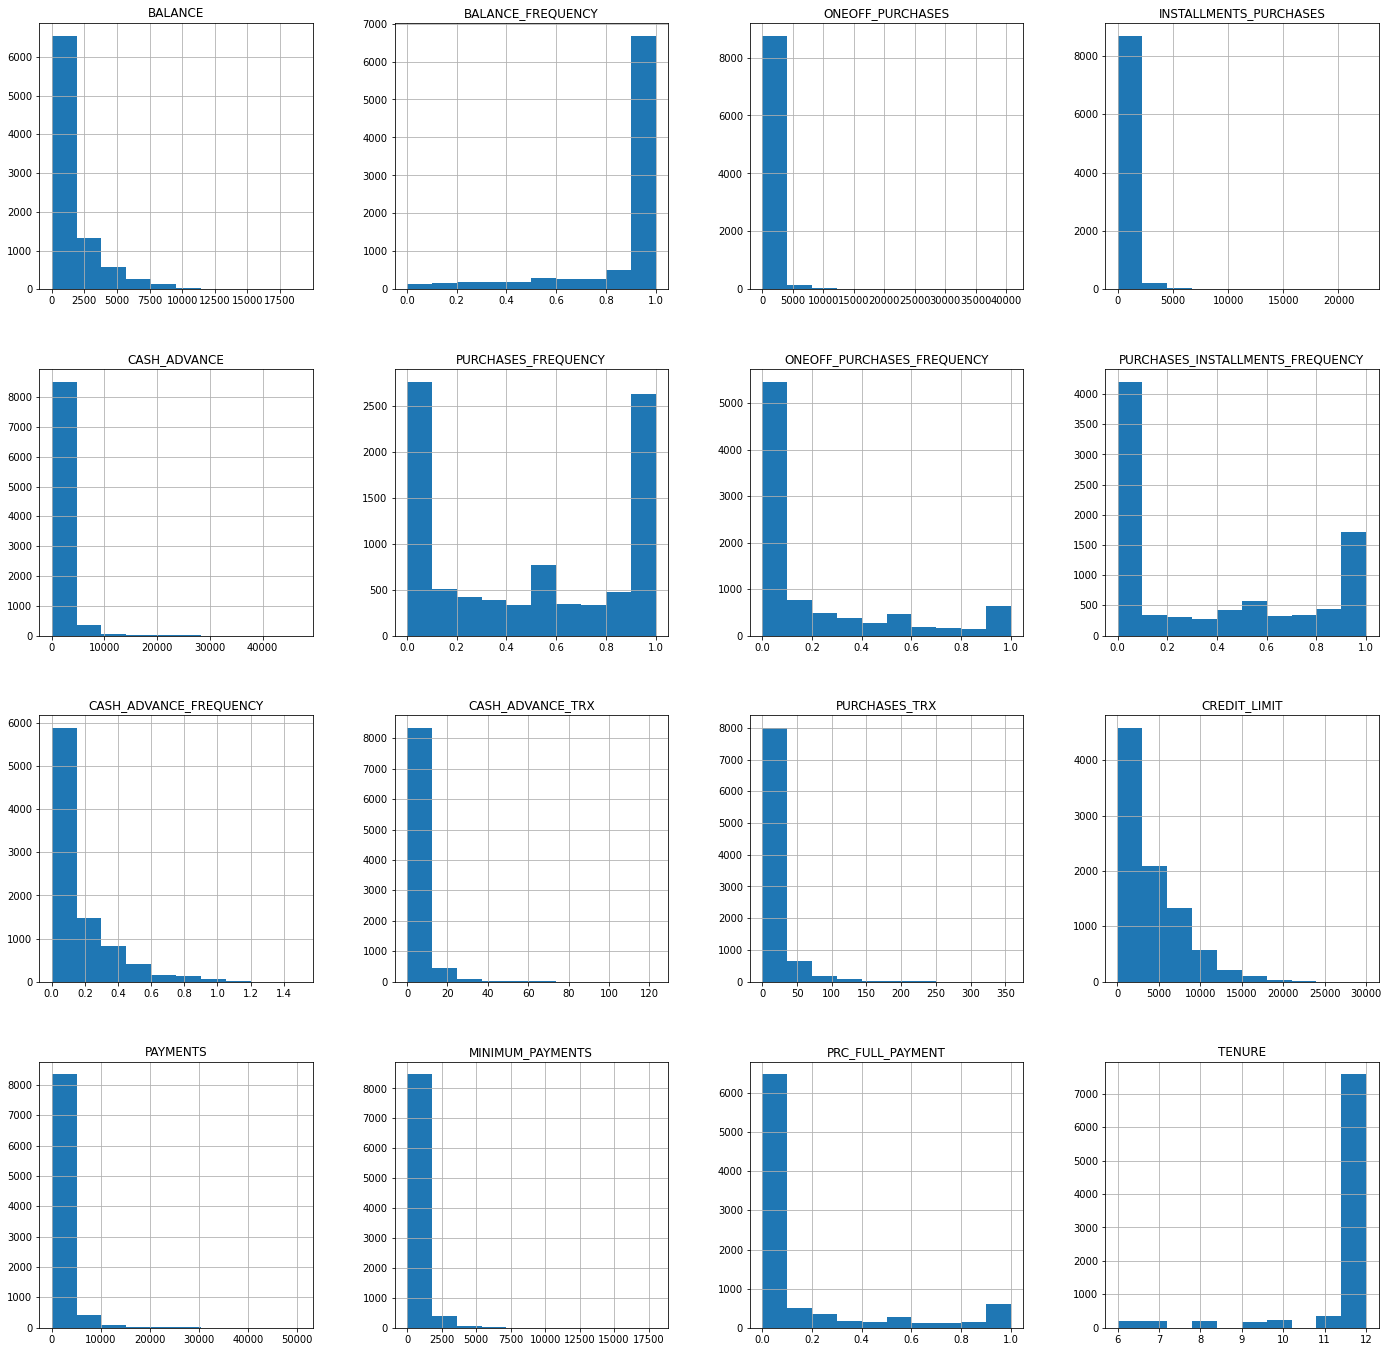

In [21]:
df_fillna_knn.hist(figsize=(24, 24))

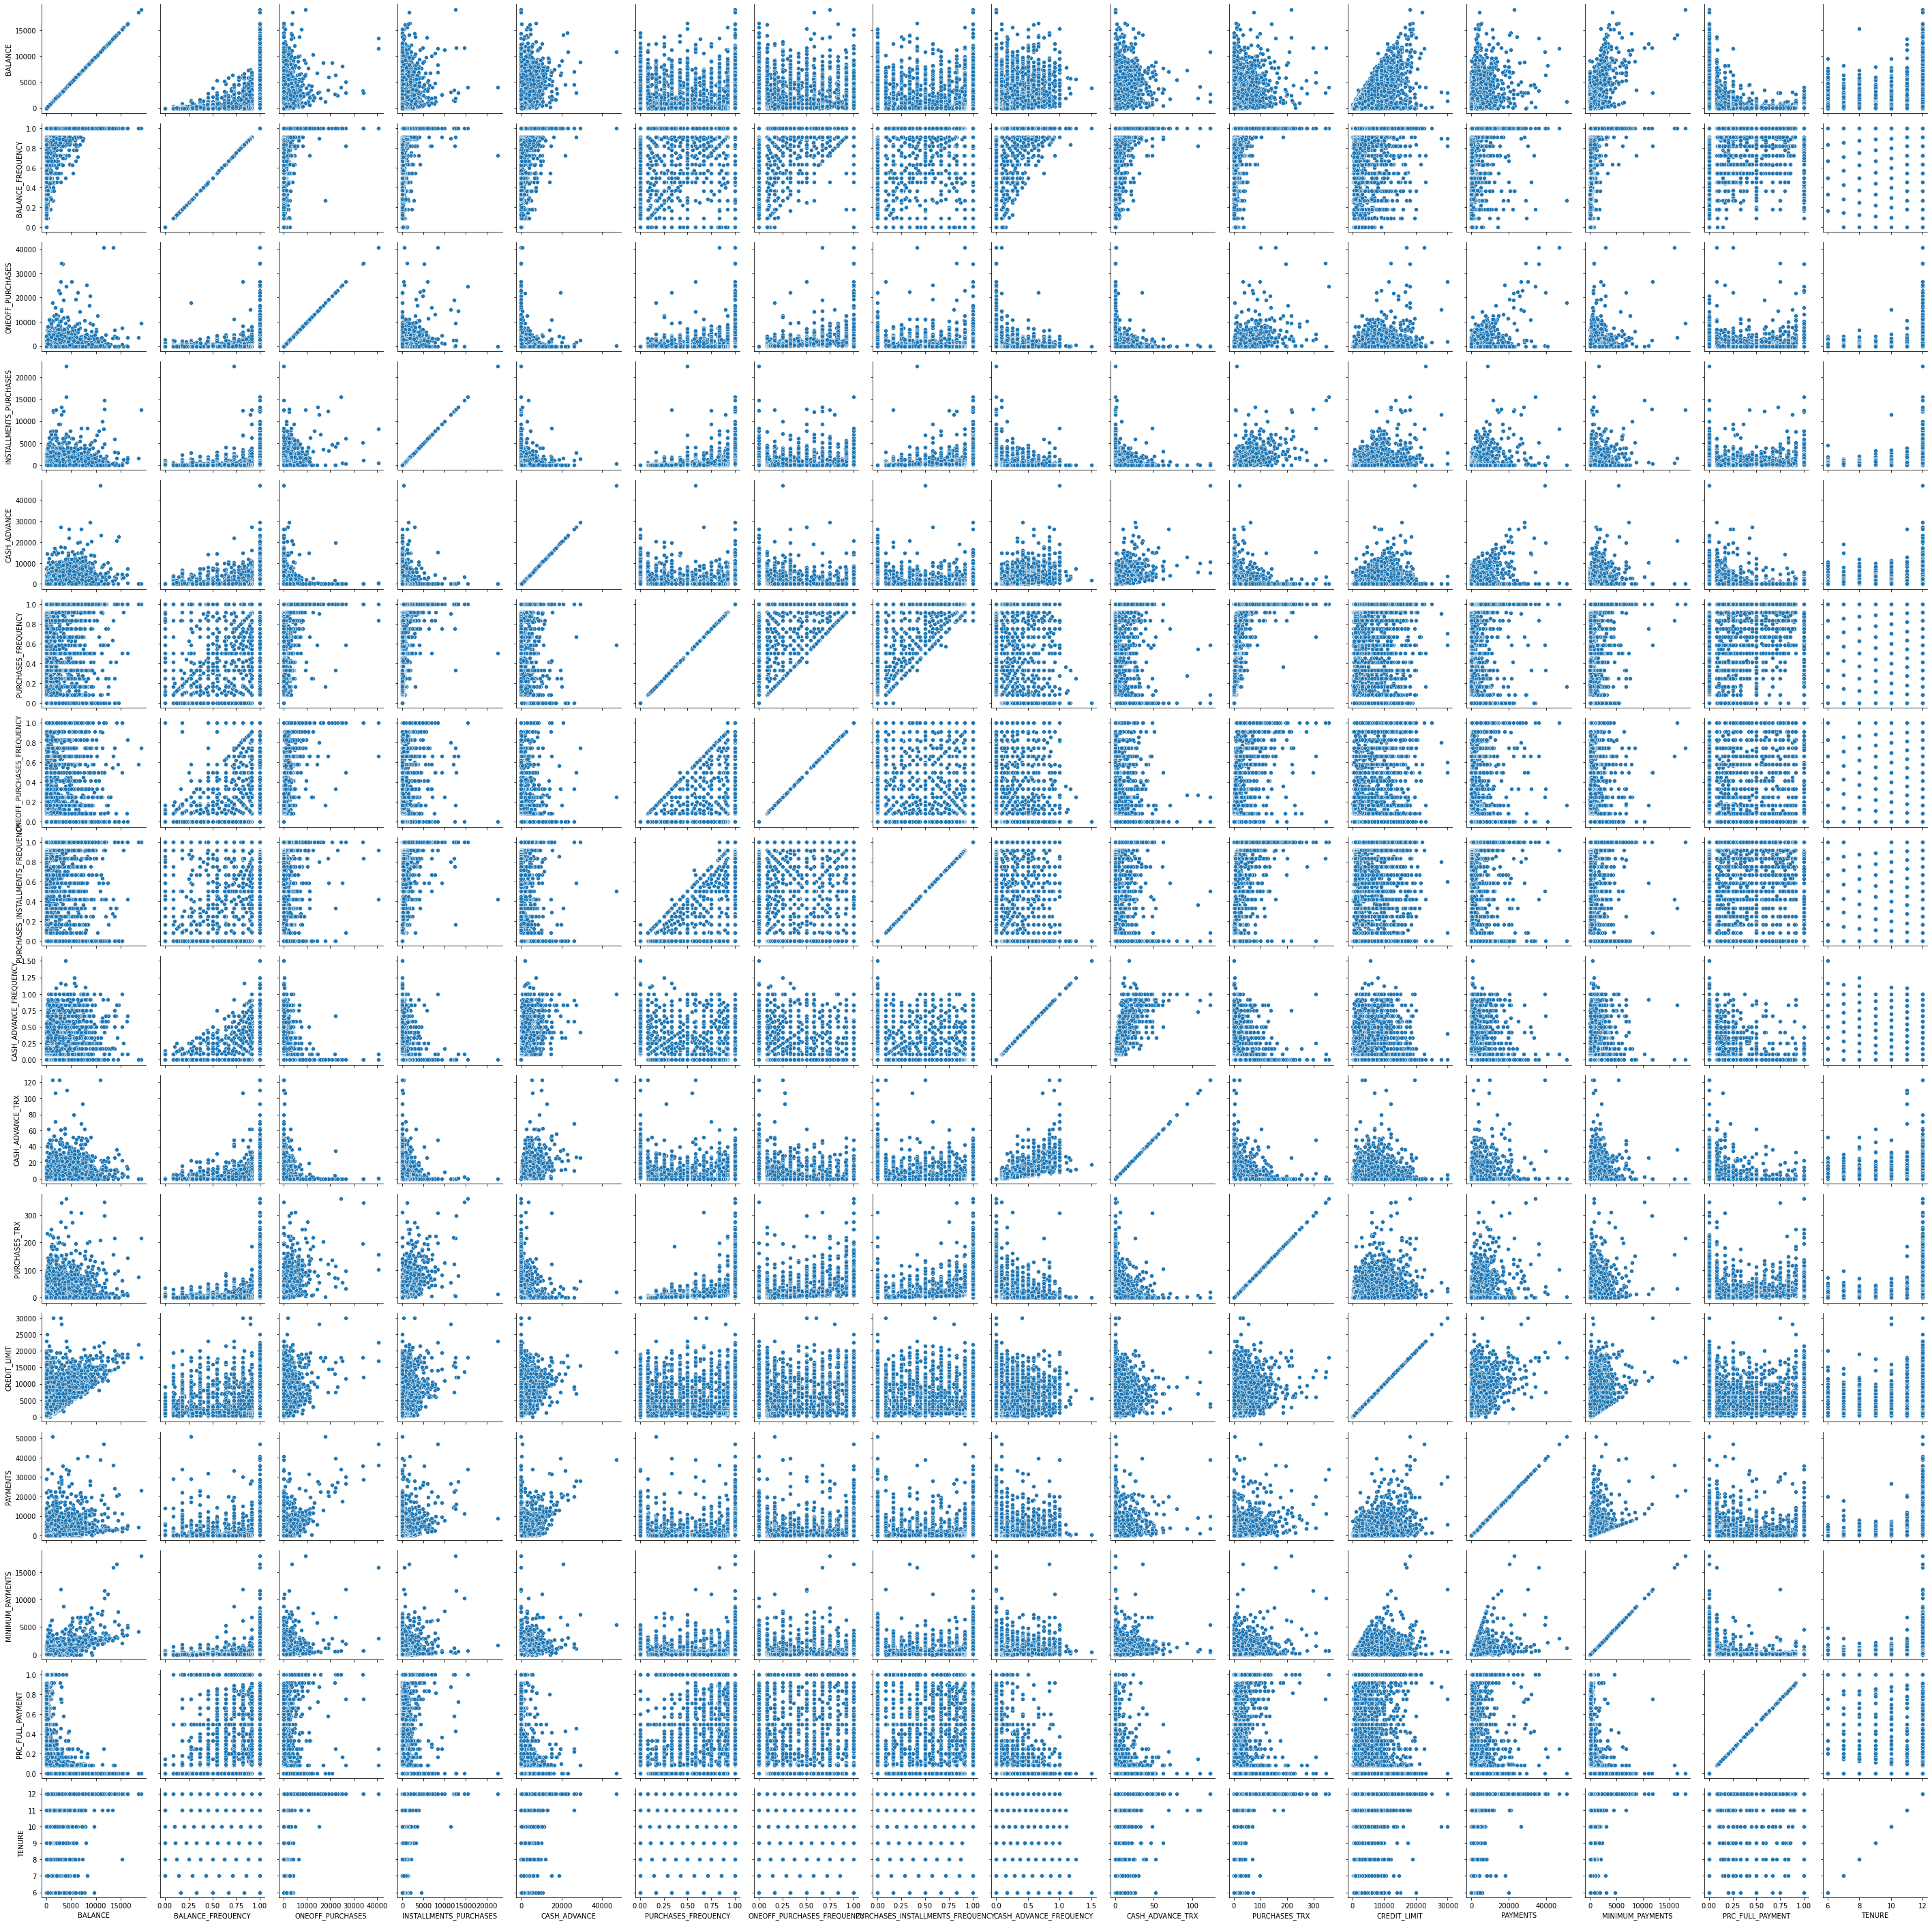

In [22]:
# Check Linear Dependency
g = sns.PairGrid(df_fillna_knn)
g.map(sns.scatterplot)

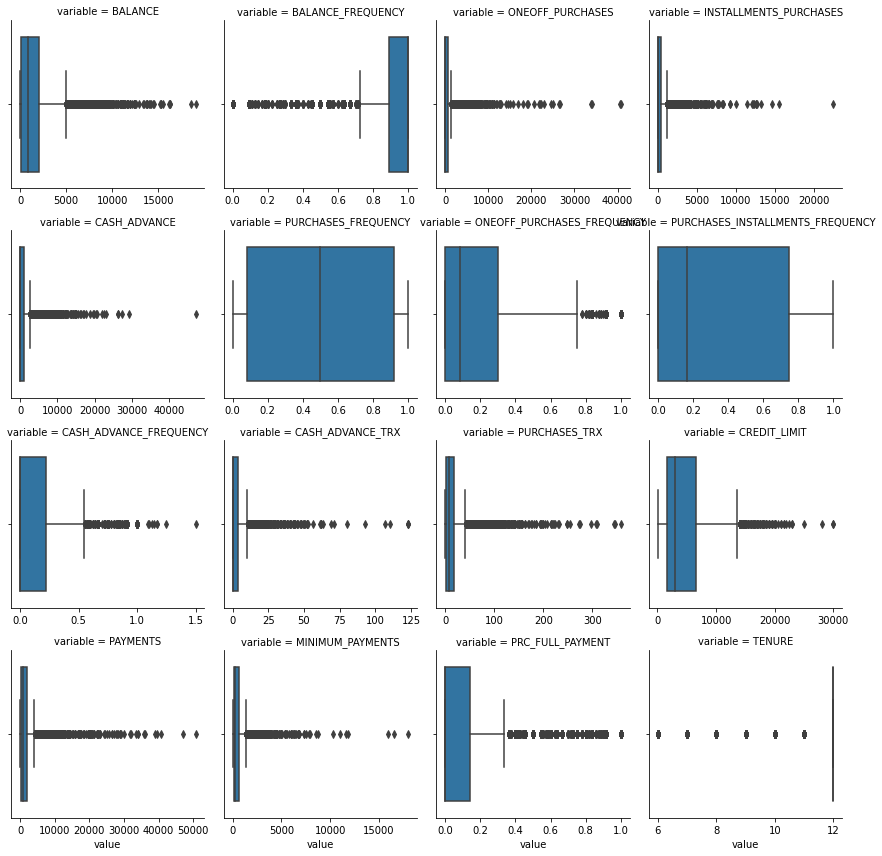

In [31]:
# plot outliers
# df.boxplot() method cannot be used because columns has diffrent scales.
def plot_all_cols(df, method):
    data = pd.melt(df, value_vars=df.columns)
    g = sns.FacetGrid(data, col='variable', col_wrap=4, sharex=False, sharey=False)
    return g.map(method, "value")

plot_all_cols(df_fillna_knn, method=sns.boxplot)

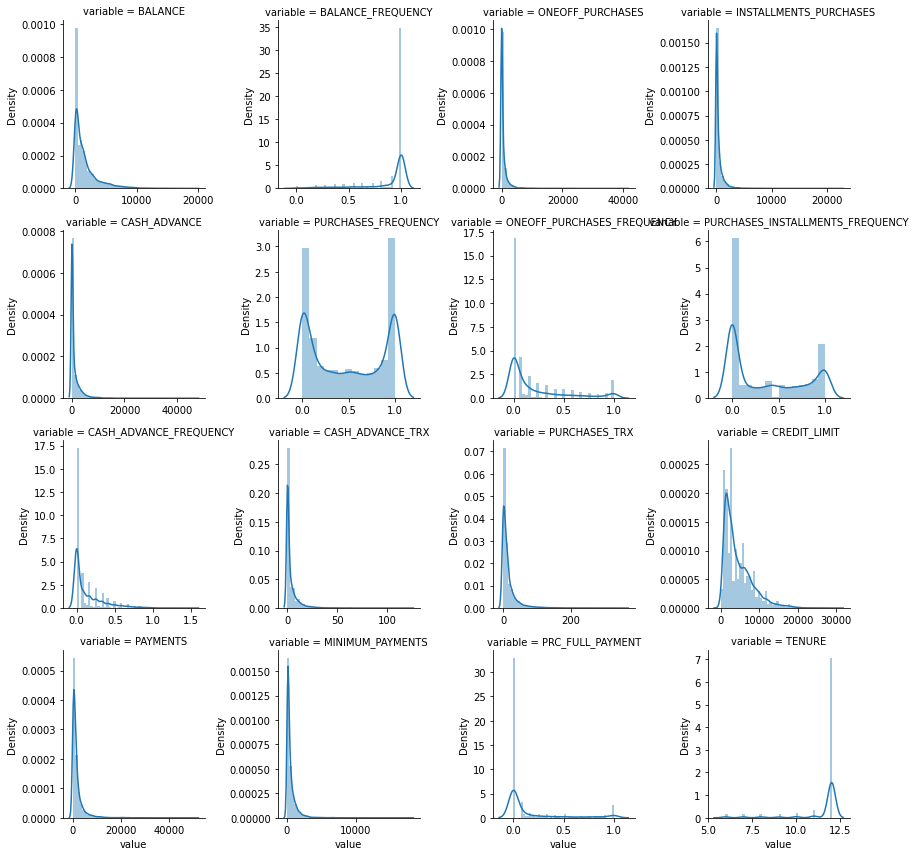

In [25]:
plot_all_cols(df_fillna_knn, method=sns.distplot)

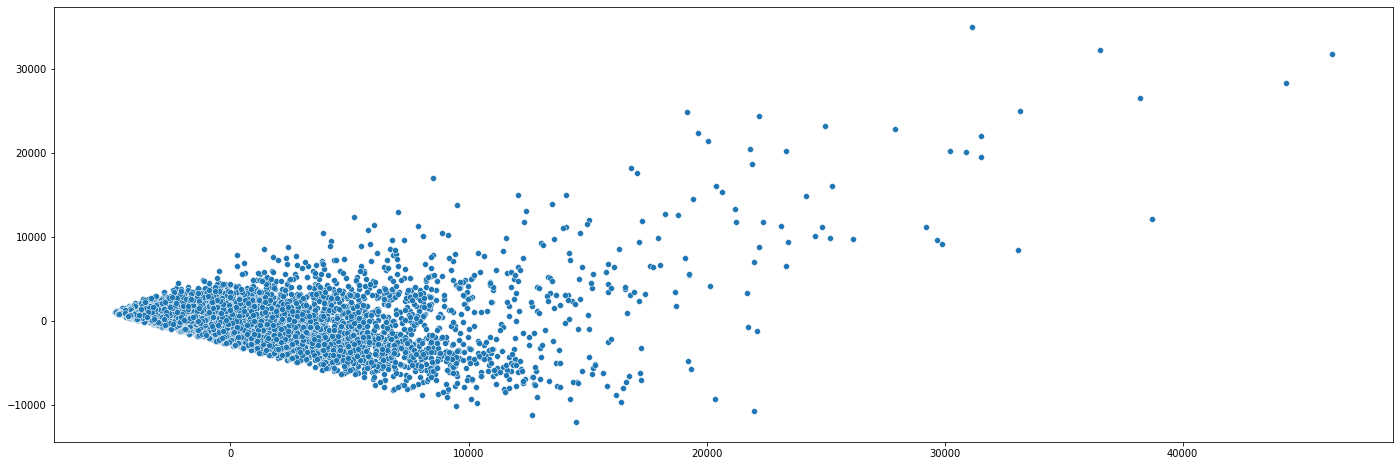

In [26]:
# To solve the outliers and different scales problems, we need to rescale features
# Try Robust scaler, but first visualize without scaling

def tsne_visualize(df):
    tsne = TSNE(learning_rate=1, init='pca', n_jobs=-1)
    result = tsne.fit_transform(df)
    sns.scatterplot(result[:, 0], result[:, 1])
    plt.show()
    
tsne_visualize(df_fillna_knn)

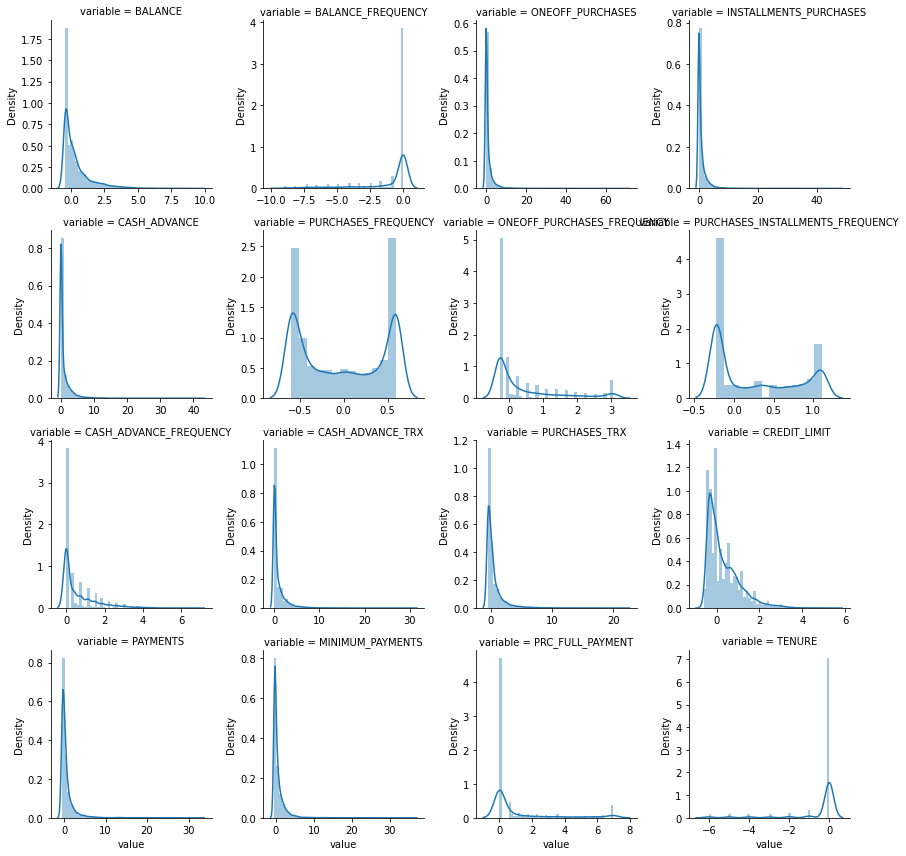

In [32]:
# Try visualizing after scaling
from sklearn.preprocessing import RobustScaler

df_robust_scaled = RobustScaler().fit_transform(df_fillna_knn)
df_robust_scaled = pd.DataFrame(data=df_robust_scaled, columns=df_fillna_knn.columns)
plot_all_cols(df_robust_scaled, method=sns.distplot)
plt.show()
tsne_visualize(df_robust_scaled)

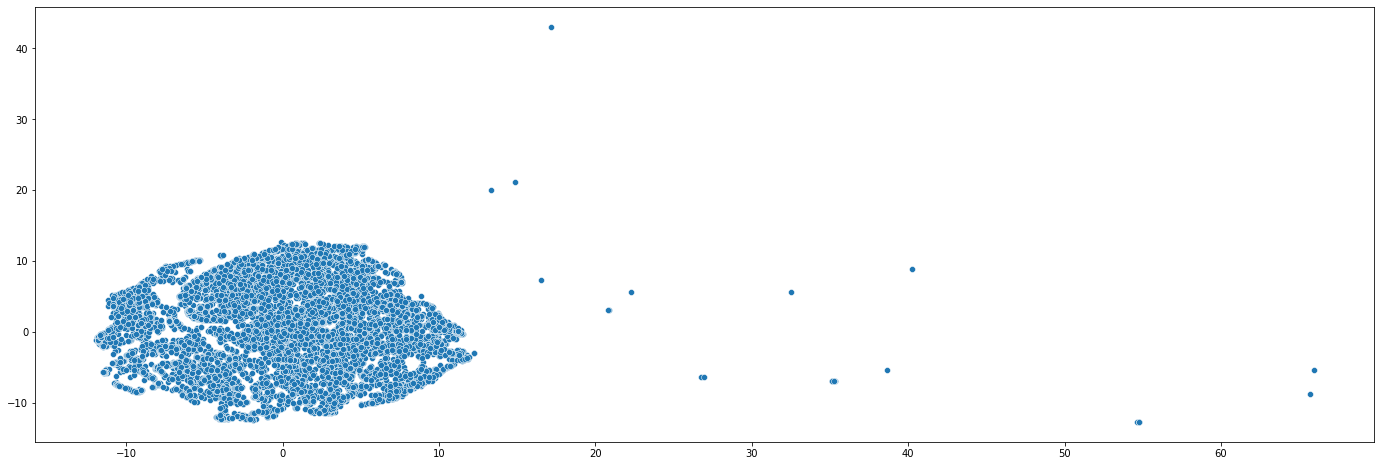

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

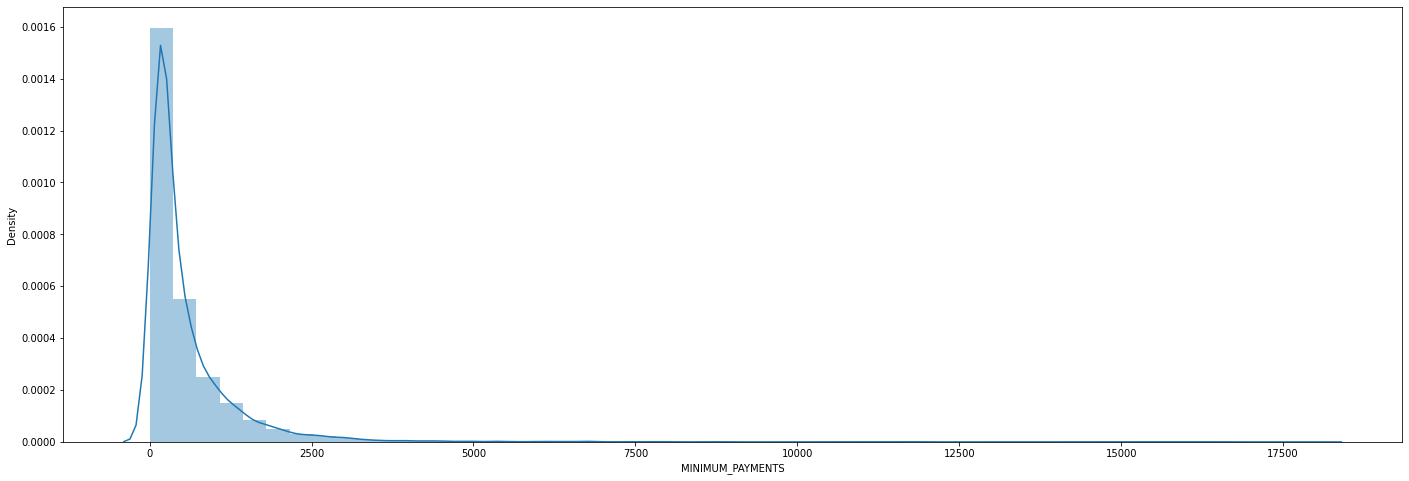

In [37]:
# log transformation
sns.distplot(df['MINIMUM_PAYMENTS'])
# sns.distplot(df['MINIMUM_PAYMENTS'].apply(np.log1p))
# sns.distplot(df['MINIMUM_PAYMENTS'].apply(np.log))

<AxesSubplot:ylabel='Density'>

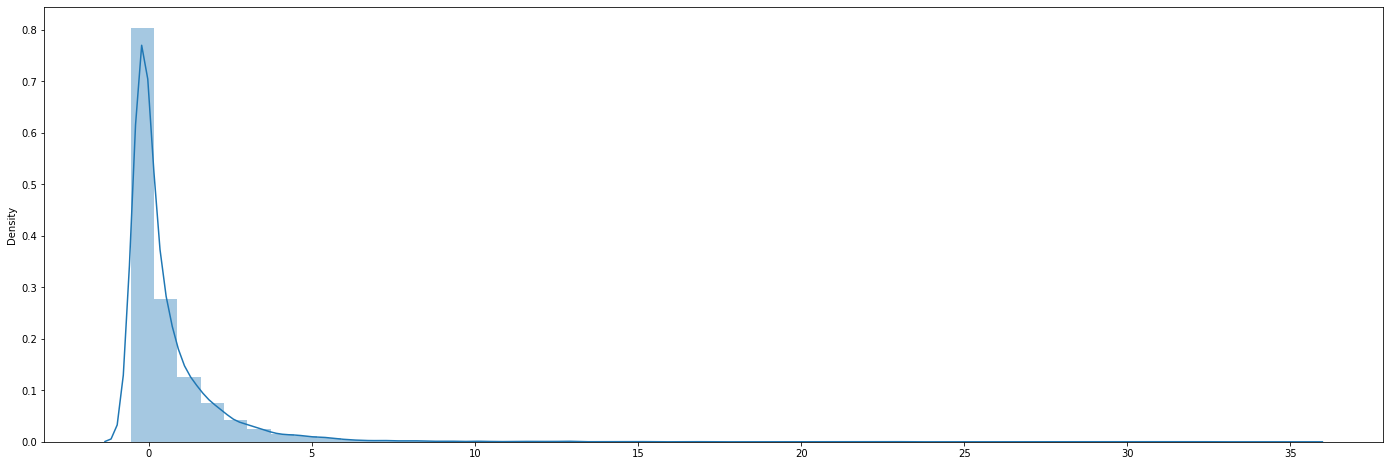

In [42]:
s2 = RobustScaler().fit_transform(df['MINIMUM_PAYMENTS'].to_numpy().reshape(-1, 1))
sns.distplot(s2)

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

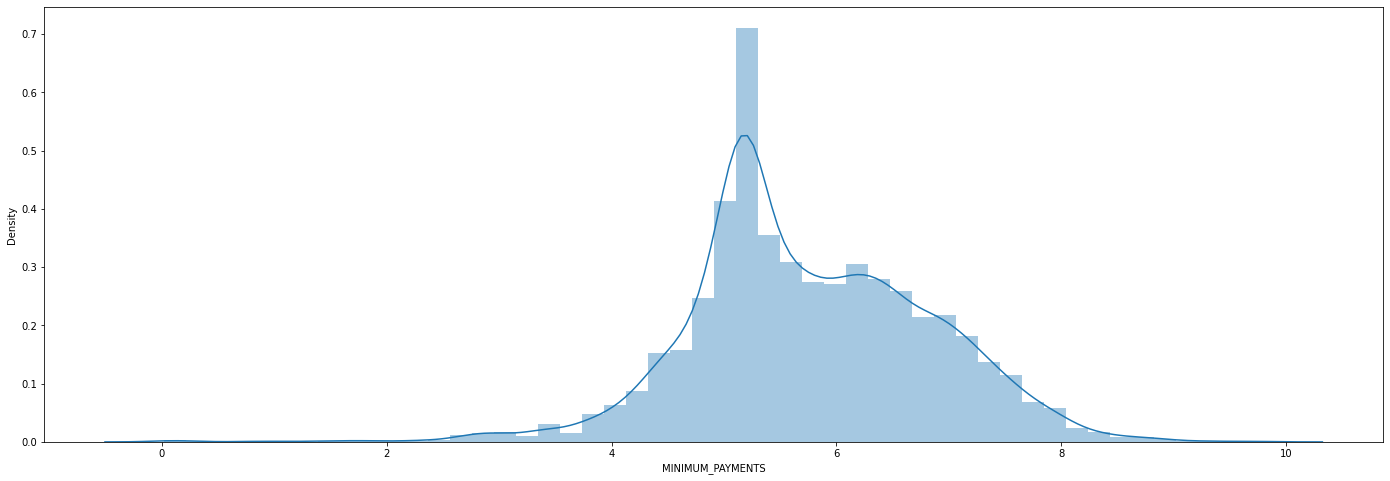

In [38]:
sns.distplot(df['MINIMUM_PAYMENTS'].apply(np.log1p))

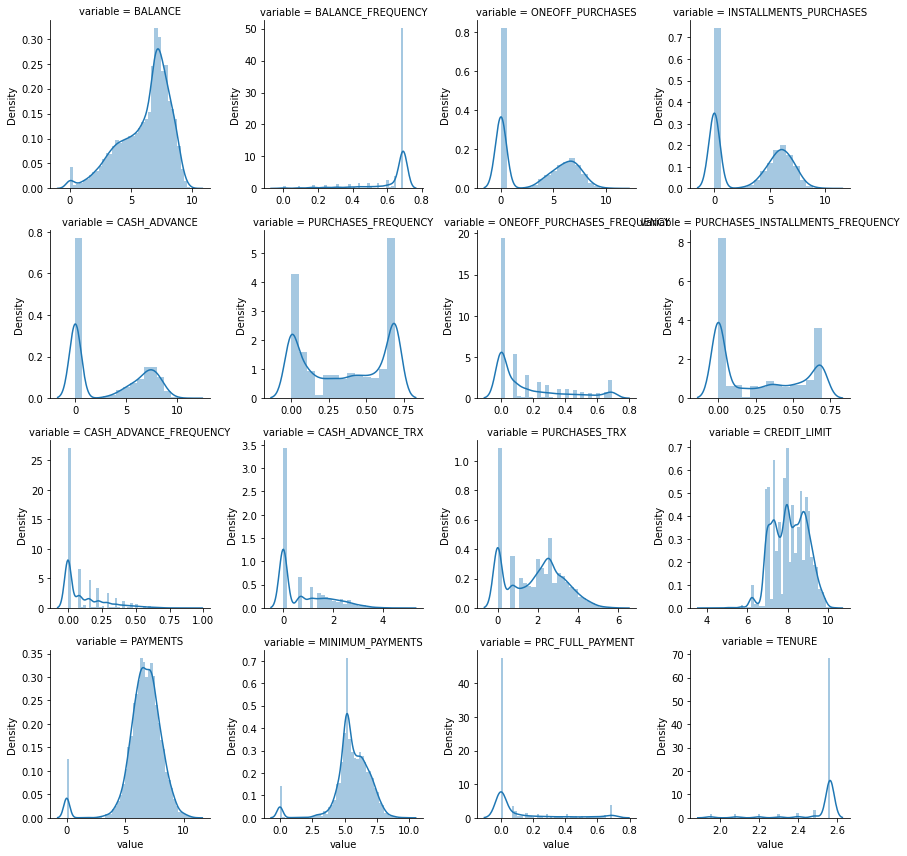

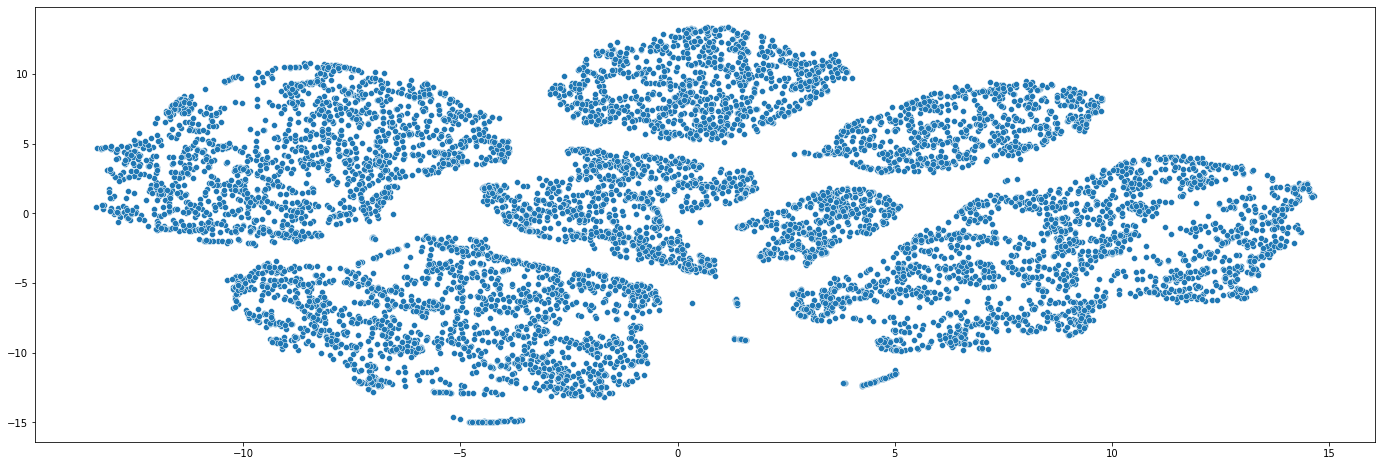

In [43]:
# RobustScaler was not enough (it changed the scale but not the distribution), Try log transformation
df_log_scaled = np.log1p(df_fillna_knn)
plot_all_cols(df_log_scaled, method=sns.distplot)
plt.show()
tsne_visualize(df_log_scaled)

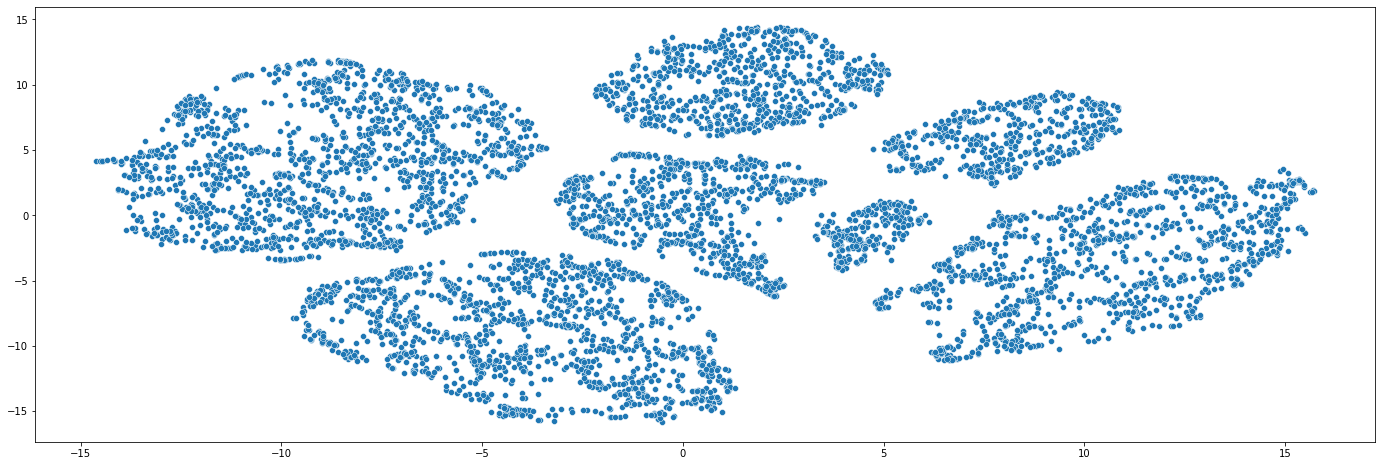

In [44]:
# Compare to df_no_guessing
tsne_visualize(np.log1p(df_no_guessing))

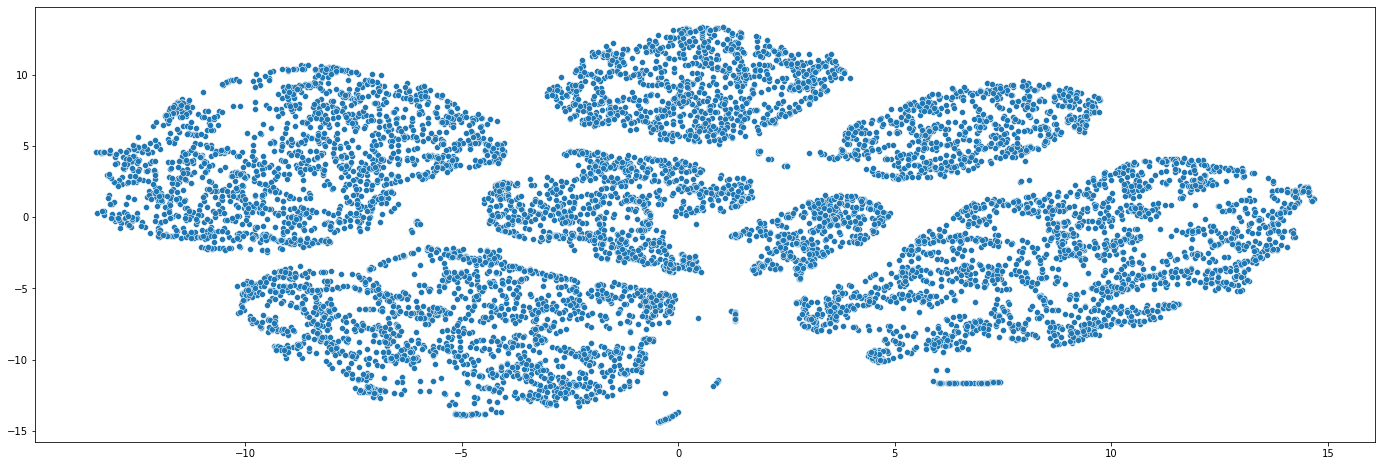

In [45]:
# Compare to df_fillna_median
tsne_visualize(np.log1p(df_fillna_median))